# Analysing how effective Dynamic Time Warping is to align spectra

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
from pprint import pprint
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 100

spectrum_filename = "/Users/jonesm5/Dropbox (The Francis Crick)/Serum_RepInj/20210616_serum_repinj_2.5ug_10.wiff.dia.extracted.txt"

ref_filename = "/Users/jonesm5/Dropbox (The Francis Crick)/Serum_RepInj/20210616_serum_repinj_2.5ug_4.wiff.dia.extracted.txt"

Read in a reference and a sample spectrum.

In [2]:
spectrum = glycoproteomics.io.read_spectrum_file(spectrum_filename)
ref = glycoproteomics.io.read_spectrum_file(ref_filename)

Bin the spectra to make them easier to work with and merge

In [3]:
rt_x_bin_size = 0.06
mz_y_bin_size = 2.0

binned_spectrum = glycoproteomics.spectrum.bin(
    spectrum,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean)

binned_ref = glycoproteomics.spectrum.bin(
    ref,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean)

ions = glycoproteomics.spectrum.list_ions(binned_spectrum)
ion = ions[0]

Call the top 10 peaks on the reference spectrum.

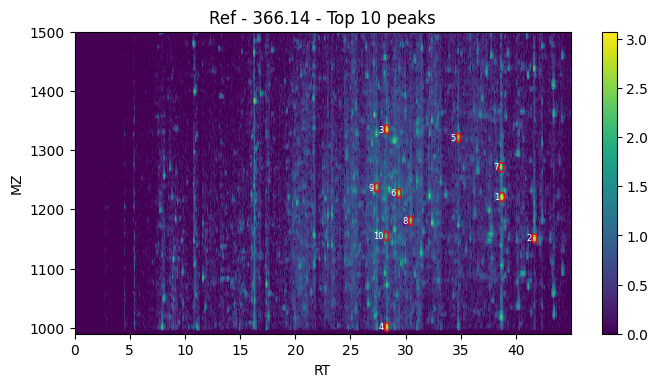

In [4]:
top_N_peaks = 10
x_radius = rt_x_bin_size * 4.0
y_radius = mz_y_bin_size * 4.0

ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_ref, ion)

peaks = glycoproteomics.peaks.find(
    ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    x_radius,
    y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "Ref - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()

Plotting these peaks onto the sample spectrum shows how much the RT values have drifted.

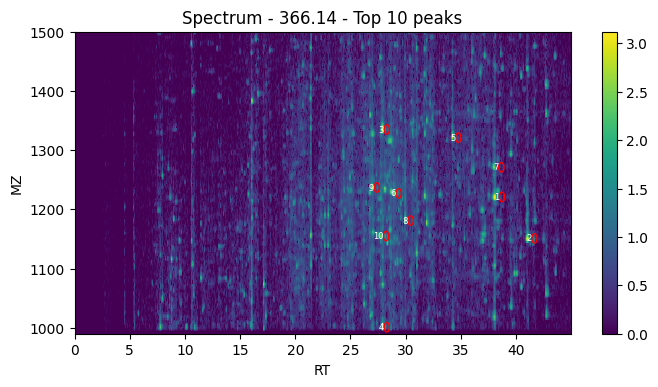

In [5]:
ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_spectrum, ion)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "Spectrum - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()

Aligning the sample spectrum to the reference RT axis results in better alignment

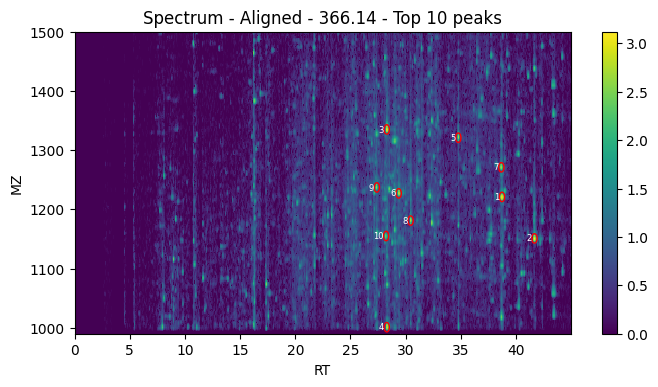

In [6]:
aligned_binned_spectrum, rt_alignment_mapping = glycoproteomics.spectrum.align_rt(binned_spectrum, binned_ref, 1)

ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(aligned_binned_spectrum, ion)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "Spectrum - Aligned - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()

However, due to the potential data duplication, this might not be the best way of extracting peak values, particular if peaks are summed to integrate them. For example, comparing this plot to the plot above shows that some peaks seem wider as a result of the alignment.

A better way of plotting the peaks would be to modify the peak locations using the RT alignment mapping.

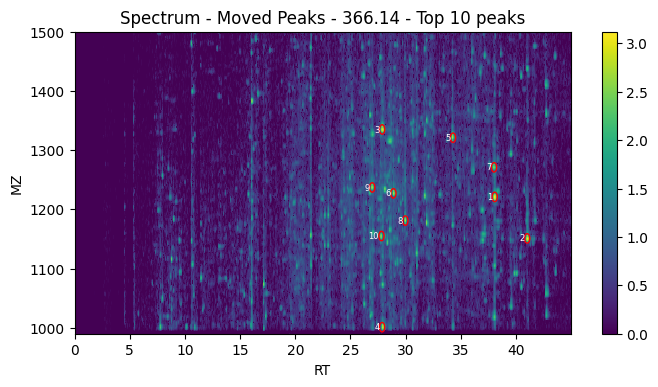

In [7]:
moved_peaks = glycoproteomics.peaks.rt_move(peaks, rt_alignment_mapping)

ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(binned_spectrum, ion)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    ion_matrix,
    x_label,
    y_label,
    moved_peaks,
    x_radius,
    y_radius,
    "Spectrum - Moved Peaks - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()